Installations & Imports

In [ ]:
import zipfile
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#**1. Load data (images and CSV) and review stucture**

##**(1) CSV**

In [ ]:
# Load the CSV file
csv_path = "train.csv"
data_info = pd.read_csv(csv_path)

In [ ]:
# Display the first few rows to check the structure of the CSV file
print("First few rows of train.csv:")
print(data_info.head())

First few rows of train.csv:
          ID   Class
0    377.jpg  MIDDLE
1  17814.jpg   YOUNG
2  21283.jpg  MIDDLE
3  16496.jpg   YOUNG
4   4487.jpg  MIDDLE


In [ ]:
# Display basic information about the CSV file
print("Summary of train.csv:")
print(data_info.info())

Summary of train.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19906 non-null  object
 1   Class   19906 non-null  object
dtypes: object(2)
memory usage: 311.2+ KB
None


In [ ]:
# Check for missing values in the CSV file
print("\nChecking for missing values in train.csv:")
print(data_info.isnull().sum())


Checking for missing values in train.csv:
ID       0
Class    0
dtype: int64


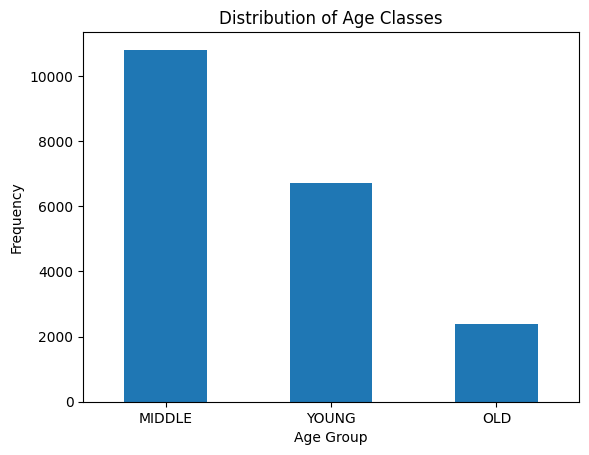

In [ ]:
# Plot histogram of class distribution
plt.figure()
data_info['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Classes')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

##**(2) Images**

In [ ]:
# Unzip the data.zip file
!unzip -q "data.zip" -d "./"

In [ ]:
# Structural analysis of images
image_folder_path = "./data/"
image_sizes = []
missing_images = []

for image_id in data_info['ID']:
  image_path = os.path.join(image_folder_path, image_id)
  if os.path.isfile(image_path):
    try:
      # Open image and get its size
      with Image.open(image_path) as img:
        image_sizes.append(img.size)
    except Exception as e:
      print(f"Error loading image {image_id}: {e}")
  else:
    missing_images.append(image_id)

In [ ]:
# Display results of the structural analysis of images
print(f"Total images listed in CSV: {len(data_info)}")
print(f"Total images found in 'data' folder: {len(image_sizes)}")
print(f"Missing images: {len(missing_images)}")

Total images listed in CSV: 19906
Total images found in 'data' folder: 19906
Missing images: 0


In [ ]:
# Analyze image resolutions
image_widths = [size[0] for size in image_sizes]
image_heights = [size[1] for size in image_sizes]

print("Image resolution statistics:")
print(f"Minimum resolution: {min(image_widths)}x{min(image_heights)}")
print(f"Maximum resolution: {max(image_widths)}x{max(image_heights)}")
print(f"Average width: {np.mean(image_widths):.2f}")
print(f"Average height: {np.mean(image_heights):.2f}")

Image resolution statistics:
Minimum resolution: 8x11
Maximum resolution: 724x713
Average width: 99.01
Average height: 125.47


In [ ]:
# Verify images match entries in the CSV file
# List images in data folder and compare with CSV entries
actual_images = set(os.listdir(image_folder_path))
listed_images = set(data_info['ID'])
extra_images = actual_images - listed_images
unlisted_images = listed_images - actual_images

print("Extra images not listed in CSV:", extra_images)
print("Images listed in CSV but not found in folder:", unlisted_images)

Extra images not listed in CSV: set()
Images listed in CSV but not found in folder: set()


#**2. Methodology (modeling)**

#**Method 1 - Convolutional Neural Networks (CNNs)**
###Data Preprocessing

Images were resized to 128x128 pixels for consistency in model input, converted to RGB, and normalized to a [0, 1] scale. Class labels (YOUNG, MIDDLE, OLD) were encoded as integers (0, 1, 2) to treat age as a categorical classification task. The data was split into training and validation sets (80-20 split) to evaluate model generalization.

###Model Architecture

The model uses a Convolutional Neural Network (CNN) with four convolutional blocks, each followed by max-pooling layers to capture spatial hierarchies and reduce dimensions. The convolutional layers progress from 32 to 128 filters, followed by a flattening layer, a dense layer with 512 units, and an output layer with three units and softmax activation for multi-class classification.

###Model Compilation and Training

The model was compiled with Sparse Categorical Crossentropy as the loss function and Adam as the optimizer for efficient gradient updates. A checkpoint callback saved the best-performing model based on validation accuracy, helping prevent overfitting. Training was conducted over 10 epochs with a batch size of 32.

###Evaluation and Analysis

Training and validation accuracy and loss were tracked across epochs. Plots of these metrics provided insights into model learning patterns, convergence, and overfitting, aiding in model optimization and final performance assessment.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5555 - loss: 0.9434
Epoch 1: val_accuracy improved from -inf to 0.66022, saving model to ./tmp/checkpoint.weights.h5
498/498 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5556 - loss: 0.9433 - val_accuracy: 0.6602 - val_loss: 0.7786
Epoch 2/10
494/498 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6597 - loss: 0.7741
Epoch 2: val_accuracy improved from 0.66022 to 0.68885, saving model to ./tmp/checkpoint.weights.h5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6597 - loss: 0.7740 - val_accuracy: 0.6888 - val_loss: 0.7205
Epoch 3/10
490/498 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6964 - loss: 0.7071
Epoch 3: val_accuracy improved from 0.68885 to 0.70467, saving model to ./tmp/checkpoint.weights.h5
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6964 - loss: 0.7069 - val_accuracy: 0.7047 - val_loss: 0.6952
Epoch 4/10
497/498 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7259 - loss: 0.6390
Epoch

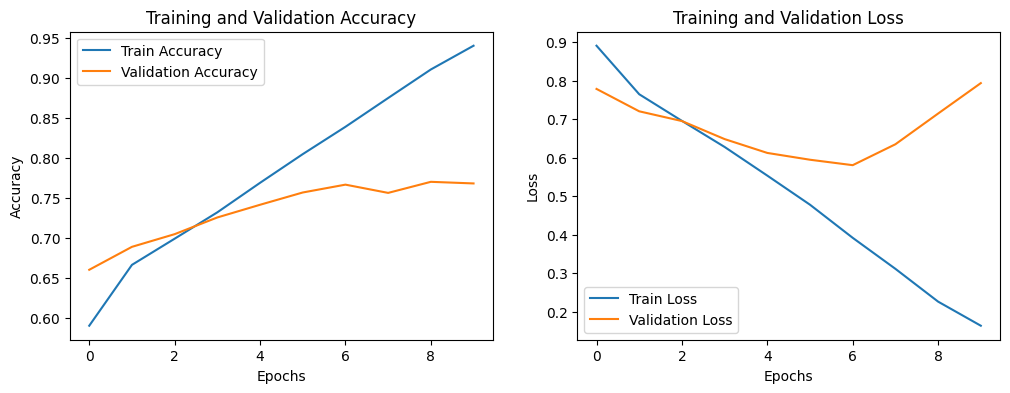

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

# Define a target image size
TARGET_SIZE = (128, 128)  # Resizing to 128x128 for CNN compatibility

# Function to preprocess images
def preprocess_image(img_path):
    img = Image.open(img_path).convert("RGB")  # Ensure 3 channels
    img = img.resize(TARGET_SIZE)  # Resize image
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0,1]
    return img_array

# Apply preprocessing to all images
image_data = []
labels = []

for _, row in data_info.iterrows():
    img_path = os.path.join(image_folder_path, row['ID'])
    label = row['Class']

    if os.path.isfile(img_path):
        img_array = preprocess_image(img_path)
        image_data.append(img_array)

        # Map label to integer
        if label == "YOUNG":
            labels.append(0)
        elif label == "MIDDLE":
            labels.append(1)
        elif label == "OLD":
            labels.append(2)

# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# 3. Define the CNN Model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 classes for YOUNG, MIDDLE, OLD
    return model

# Create model
model = create_cnn_model()

# 4. Compile the Model
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 5. Setup Checkpointing
checkpoint_filepath = './tmp/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# 6. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint_callback]
)

# 7. Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

###Milestone 3

In [ ]:
!pip install ray[tune]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 32.7 MB/s eta 0:00:00


Trial 30 Complete [00h 01m 03s]
val_accuracy: 0.7295328974723816

Best val_accuracy So Far: 0.7702159881591797
Total elapsed time: 00h 14m 35s
Best hyperparameters found:
Conv1 Filters: 64
Conv1 Kernel: 5
Conv2 Filters: 128
Conv2 Kernel: 3
Conv3 Filters: 128
Conv3 Kernel: 3
Conv4 Filters: 128
Conv4 Kernel: 3
Dense Units: 256
Optimizer: adam
Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5546 - loss: 0.9391 - val_accuracy: 0.6135 - val_loss: 0.8322
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6629 - loss: 0.7813 - val_accuracy: 0.6773 - val_loss: 0.7466
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6919 - loss: 0.7197 - val_accuracy: 0.7012 - val_loss: 0.6975
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7148 - loss: 0.6676 - val_accuracy: 0.6964 - val_loss: 0.6881
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7465 - loss: 0.6018 - val_accuracy: 0.7328 - val_loss: 0.6272
Epoch 6/10
498/

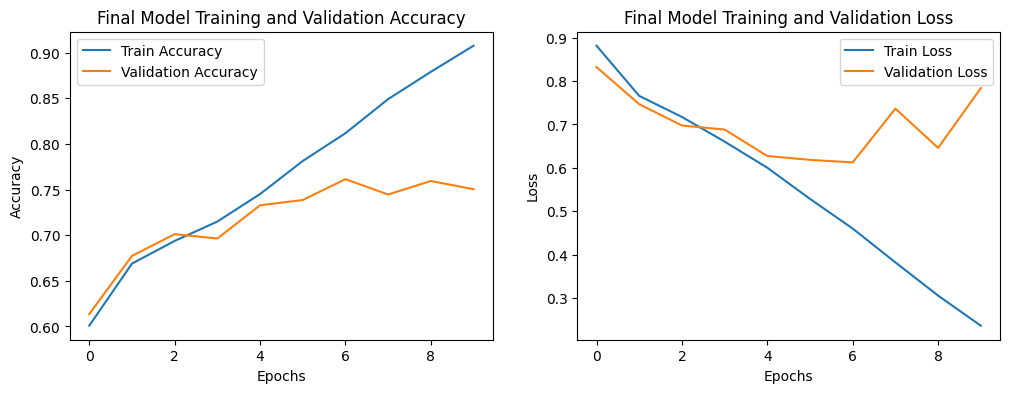

In [ ]:
!pip install keras-tuner

import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=64, step=32),
        kernel_size=hp.Choice('conv1_kernel', values=[3,5]),
        activation='relu',
        input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=64),
        kernel_size=hp.Choice('conv2_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=256, step=64),
        kernel_size=hp.Choice('conv3_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fourth convolutional layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv4_filters', min_value=128, max_value=256, step=64),
        kernel_size=hp.Choice('conv4_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=256, max_value=1024, step=256),
        activation='relu'
    ))

    # Output layer
    model.add(layers.Dense(3, activation='softmax'))

    # Compile model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Initialize Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,       # Maximum number of epochs to train each model
    factor=3,            # Factor by which the number of epochs is reduced
    directory='hyperband_dir',
    project_name='age_classification_tuning'
)

# Early stop callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Run the tuner search
tuner.search(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[stop_early]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print("Conv1 Filters:", best_hps.get('conv1_filters'))
print("Conv1 Kernel:", best_hps.get('conv1_kernel'))
print("Conv2 Filters:", best_hps.get('conv2_filters'))
print("Conv2 Kernel:", best_hps.get('conv2_kernel'))
print("Conv3 Filters:", best_hps.get('conv3_filters'))
print("Conv3 Kernel:", best_hps.get('conv3_kernel'))
print("Conv4 Filters:", best_hps.get('conv4_filters'))
print("Conv4 Kernel:", best_hps.get('conv4_kernel'))
print("Dense Units:", best_hps.get('dense_units'))
print("Optimizer:", best_hps.get('optimizer'))

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val)
)

# Evaluate the final model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Final model validation accuracy: {val_acc}")

# If desired, plot training history for this final model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Final Model Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Final Model Training and Validation Loss')
plt.show()


#**Method 2 - Transfer Learning (ResNet and MobileNet)**
### Data Preparation and Preprocessing

Images were resized to 128x128 pixels for consistency in model input, converted to RGB, and normalized to a [0, 1] scale. Class labels (YOUNG, MIDDLE, OLD) were encoded as integers (0, 1, 2) to treat age as a categorical classification task. The data was split into training and validation sets (80-20 split) to evaluate model generalization.

###Model Architecture
The images were resized to a target size of **128x128 pixels** for compatibility with deep learning architectures. For ResNet50 and MobileNetV2 models, each image was preprocessed according to the specific requirements of each network. ResNet50 applies a preprocessing function that scales pixel values between **-1 and 1**, while MobileNetV2 uses its own preprocessing function designed for its architecture. Labels were converted into categorical integers, representing the age classes: YOUNG, MIDDLE, and OLD.

Two pre-trained models, **ResNet50** and **MobileNetV2**, were used for transfer learning. The base model layers were set to non-trainable initially, leveraging the pretrained features from the **ImageNet** dataset. A custom classification head was added on top of each model, consisting of a **GlobalAveragePooling2D** layer, a dropout layer with a rate of **0.2** for regularization, and a final dense layer with a **softmax activation** to classify the three age categories. This structure allows for both feature extraction and effective classification on the given dataset.

### Training and Fine-Tuning
Each model was initially trained in a feature extraction phase using a **low learning rate of 0.0001** to retain the pretrained features. After the initial training, fine-tuning was enabled by unfreezing the last 10 layers of the base models, allowing the network to learn more specialized features on the age dataset. A reduced learning rate of **1e-5** was applied during this phase to stabilize training and prevent overfitting.

### Evaluation and Visualization
Training and validation metrics were recorded over each epoch, and both accuracy and loss were plotted to visualize the model's performance. These plots provided insights into the efficacy of the fine-tuning phase and confirmed model generalization by observing trends in validation metrics compared to training.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, MobileNetV2

# Set the input shape and target size for images
TARGET_SIZE = (128, 128)

# Preprocessing function for ResNet (scales pixel values between -1 and 1)
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# Load pre-trained ResNet model without the top layer
base_model = ResNet50(input_shape=TARGET_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model for feature extraction

# Add custom classification layers on top of the base model
inputs = tf.keras.Input(shape=TARGET_SIZE + (3,))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Convert features to a single vector per image
x = layers.Dropout(0.2)(x)  # Dropout layer for regularization
outputs = layers.Dense(3, activation='softmax')(x)  # 3 classes: YOUNG, MIDDLE, OLD
model = tf.keras.Model(inputs, outputs)

# Compile the model with a low learning rate for feature extraction
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_3 (GetItem)      │ (None, 128, 128)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_4 (GetItem)      │ (None, 128, 128)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_5 (GetItem)      │ (None, 128, 128)       │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_1 (Stack)           │ (None, 128, 128, 3)    │              0 │ get_item_3[0][0],      │
│                           │                        │                │ get_item_4[0][0],      │
│                           │                        │                │ get_item_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 128, 128, 3)    │              0 │ stack_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 4, 4, 2048)     │     23,587,712 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 3)              │          6,147 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5138 - loss: 0.9785 - val_accuracy: 0.5477 - val_loss: 0.9488
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5340 - loss: 0.9657 - val_accuracy: 0.5477 - val_loss: 0.9463
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5387 - loss: 0.9610 - val_accuracy: 0.5477 - val_loss: 0.9451
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5460 - loss: 0.9617 - val_accuracy: 0.5477 - val_loss: 0.9438
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5418 - loss: 0.9630 - val_accuracy: 0.5477 - val_loss: 0.9430
Epoch 6/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5378 - loss: 0.9553 - val_accuracy: 0.5477 - val_loss: 0.9428
Epoch 7/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5455 - loss: 0.9459 - val_accuracy: 0.5470 - val_loss: 0.9410
Epoch 8/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5422 - loss: 0.9452 - val_acc

In [ ]:
# Unfreeze some layers for fine-tuning
base_model.trainable = True

# Fine-tune only the last 10 layers of the ResNet model
fine_tune_at = len(base_model.layers) - 10
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a smaller learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10
total_epochs = 20  # Initial 10 + fine-tune 10
history_fine = model.fit(
    x_train, y_train,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 10/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.5747 - loss: 0.9100 - val_accuracy: 0.6205 - val_loss: 0.8414
Epoch 11/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6146 - loss: 0.8493 - val_accuracy: 0.6298 - val_loss: 0.8320
Epoch 12/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6468 - loss: 0.8022 - val_accuracy: 0.6308 - val_loss: 0.8206
Epoch 13/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6468 - loss: 0.7961 - val_accuracy: 0.6439 - val_loss: 0.8009
Epoch 14/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6634 - loss: 0.7646 - val_accuracy: 0.6597 - val_loss: 0.7834
Epoch 15/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6574 - loss: 0.7766 - val_accuracy: 0.6587 - val_loss: 0.7841
Epoch 16/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6754 - loss: 0.7534 - val_accuracy: 0.6539 - val_loss: 0.7662
Epoch 17/20
498/498 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6743 - loss: 0.7445 -

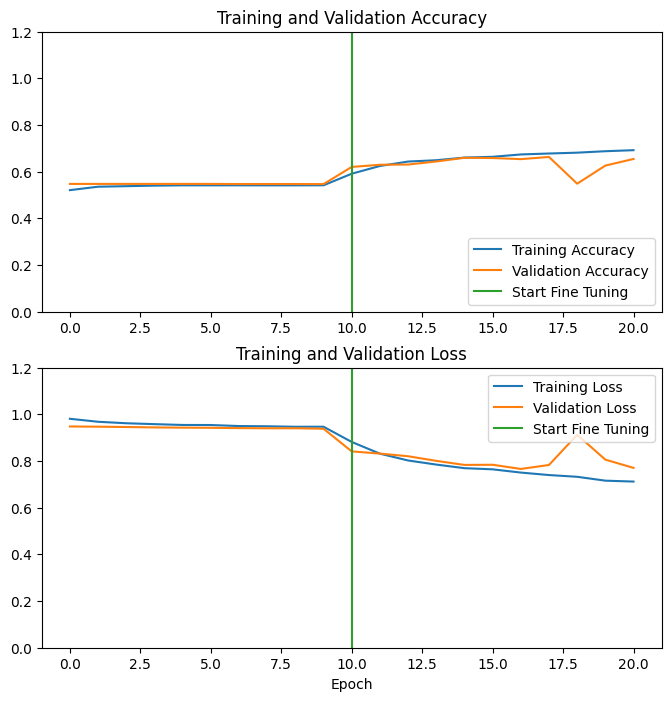

In [ ]:
# Plot Training History
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.2])
plt.plot([len(history.history['accuracy']), len(history.history['accuracy'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.2])
plt.plot([len(history.history['loss']), len(history.history['loss'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

###Milestone 3

Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.5676 - loss: 1.0089 - val_accuracy: 0.5460 - val_loss: 1.0355
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.7064 - loss: 0.6793 - val_accuracy: 0.5141 - val_loss: 0.9957
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7628 - loss: 0.5634 - val_accuracy: 0.6226 - val_loss: 0.8401
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8021 - loss: 0.4664 - val_accuracy: 0.4189 - val_loss: 1.1959
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8516 - loss: 0.3735 - val_accuracy: 0.6670 - val_loss: 0.9144
Epoch 6/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8867 - loss: 0.3054 - val_accuracy: 0.3910 - val_loss: 1.6149
Epoch 7/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9143 - loss: 0.2341 - val_accuracy: 0.6195 - val_loss: 1.0974
Epoch 8/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9330 - loss: 0.1844 - 

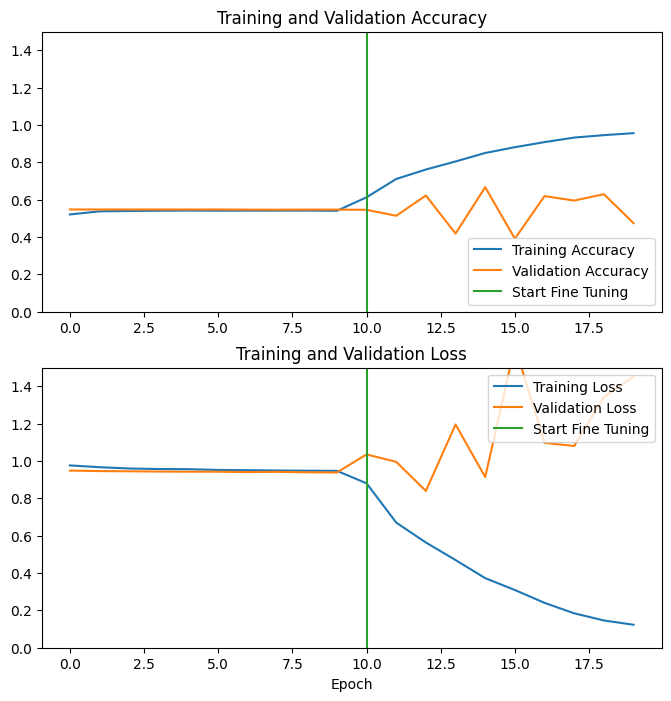

In [ ]:
# Make the base model trainable for fine-tuning
base_model.trainable = True

# Define a custom optimizer with layer-specific learning rates
class LayerSpecificLearningRate(tf.keras.optimizers.Adam):
    def __init__(self, base_lr=1e-5, layer_lr_factor=10, **kwargs):
        """
        Custom optimizer with layer-specific learning rates.
        :param base_lr: The learning rate for pre-trained layers.
        :param layer_lr_factor: The multiplier for newly added layers.
        """
        super().__init__(learning_rate=base_lr, **kwargs)
        self.base_lr = base_lr
        self.layer_lr_factor = layer_lr_factor

    def _compute_gradients(self, tape, loss, var_list, grad_loss=None, tape_options=None):
        gradients = tape.gradient(loss, var_list, grad_loss)
        updated_gradients = []
        for grad, var in zip(gradients, var_list):
            # Check if the variable belongs to the base model
            if any(layer.name in var.name for layer in base_model.layers):
                updated_gradients.append(grad)  # Keep gradients unchanged for the base model
            else:
                updated_gradients.append(grad * self.layer_lr_factor)  # Scale gradients for new layers
        return updated_gradients, var_list

# Use the custom optimizer for fine-tuning
custom_optimizer = LayerSpecificLearningRate(base_lr=1e-5, layer_lr_factor=10)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
fine_tune_epochs = 10
history_fine = model.fit(
    x_train, y_train,
    epochs=fine_tune_epochs,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Training History
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.5])
plt.plot([len(history.history['accuracy']), len(history.history['accuracy'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.plot([len(history.history['loss']), len(history.history['loss'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Set the input shape and target size for images
TARGET_SIZE = (128, 128)  # Change based on your dataset requirements

# Preprocessing function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Load pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(input_shape=TARGET_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model for feature extraction

# Add custom classification layers on top of the base model
inputs = tf.keras.Input(shape=TARGET_SIZE + (3,))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Convert features to a single vector per image
x = layers.Dropout(0.2)(x)  # Dropout layer for regularization
outputs = layers.Dense(3, activation='softmax')(x)  # 3 classes: YOUNG, MIDDLE, OLD
model = tf.keras.Model(inputs, outputs)

# Compile the model with a low learning rate for feature extraction
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model for feature extraction
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_3 (TrueDivide)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_3 (Subtract)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.4856 - loss: 1.0377 - val_accuracy: 0.5477 - val_loss: 0.9501
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4889 - loss: 1.0153 - val_accuracy: 0.5477 - val_loss: 0.9508
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4961 - loss: 0.9993 - val_accuracy: 0.5477 - val_loss: 0.9461
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5085 - loss: 0.9892 - val_accuracy: 0.5477 - val_loss: 0.9473
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5061 - loss: 0.9911 - val_accuracy: 0.5477 - val_loss: 0.9465
Epoch 6/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5194 - loss: 0.9758 - val_accuracy: 0.5477 - val_loss: 0.9440
Epoch 7/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5217 - loss: 0.9741 - val_accuracy: 0.5477 - val_loss: 0.9426
Epoch 8/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5414 - loss: 0.9662 - val_accuracy: 

Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 610ms/step - accuracy: 0.4466 - loss: 1.0275 - val_accuracy: 0.4600 - val_loss: 1.0792
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5527 - loss: 0.9635 - val_accuracy: 0.4600 - val_loss: 1.0836
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5791 - loss: 0.9269 - val_accuracy: 0.4600 - val_loss: 1.0812
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5785 - loss: 0.9535 - val_accuracy: 0.4600 - val_loss: 1.0860
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5540 - loss: 0.9631 - val_accuracy: 0.4600 - val_loss: 1.0918
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5383 - loss: 0.9593 - val_accuracy: 0.4600 - val_loss: 1.0977
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5488 - loss: 0.9138 - val_accuracy: 0.4600 - val_loss: 1.0976
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5674 - loss: 0.9538 - val_accuracy: 

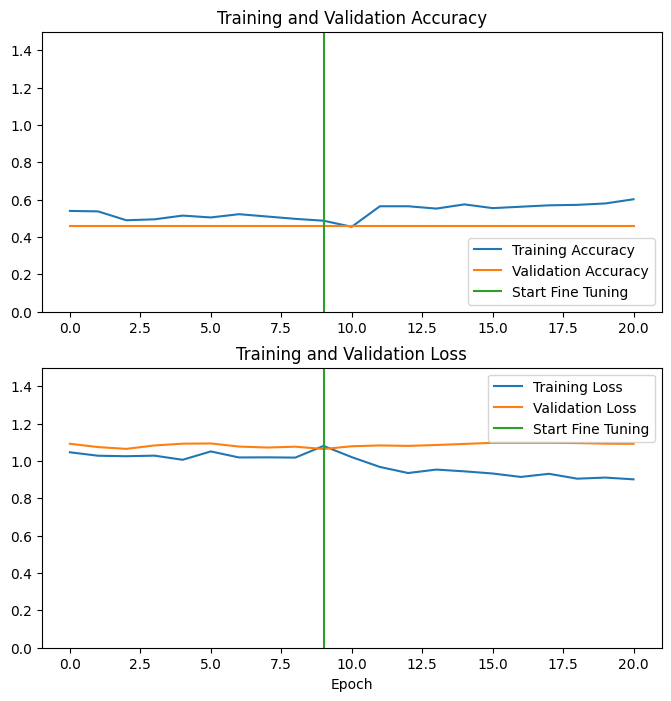

In [ ]:
# Fine-tuning the model

# Unfreeze the base model
base_model.trainable = True

# Fine-tune only the last few layers of the MobileNetV2 model
fine_tune_at = len(base_model.layers) - 10  # Adjust based on desired fine-tuning layers
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a smaller learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10
total_epochs = 20  # Initial 10 + fine-tune 10
history_fine = model.fit(
    x_train, y_train,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Training History
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.5])
plt.plot([len(history.history['accuracy']), len(history.history['accuracy'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.plot([len(history.history['loss']), len(history.history['loss'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


###Milstone 3

Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 65s 57ms/step - accuracy: 0.4300 - loss: 1.5027 - val_accuracy: 0.5409 - val_loss: 1.0233
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6220 - loss: 0.8539 - val_accuracy: 0.5397 - val_loss: 1.0255
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6764 - loss: 0.7467 - val_accuracy: 0.5477 - val_loss: 1.1800
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7169 - loss: 0.6666 - val_accuracy: 0.5477 - val_loss: 1.1760
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7526 - loss: 0.5862 - val_accuracy: 0.5477 - val_loss: 1.4401
Epoch 6/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7819 - loss: 0.5275 - val_accuracy: 0.5477 - val_loss: 1.7420
Epoch 7/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8029 - loss: 0.4824 - val_accuracy: 0.5477 - val_loss: 1.8774
Epoch 8/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8250 - loss: 0.4370 - val_acc

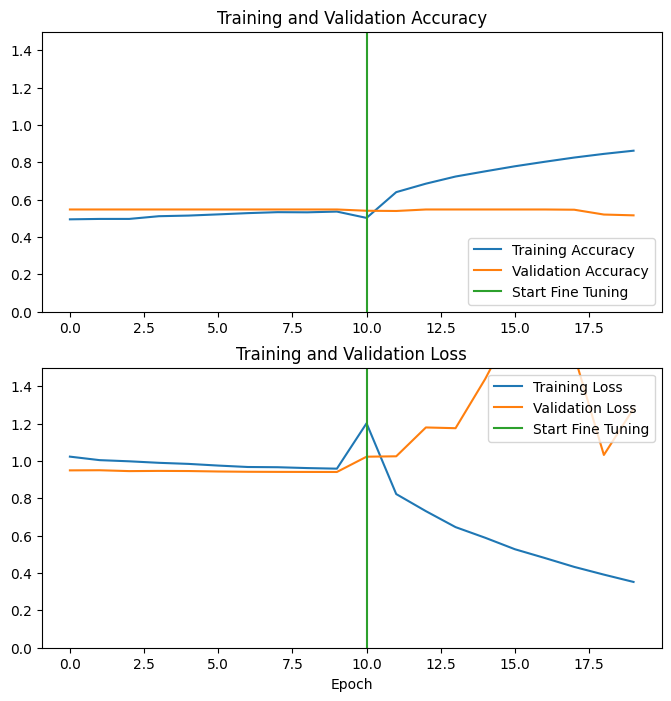

In [ ]:
# Make the base model trainable for fine-tuning
base_model.trainable = True

# Define a custom optimizer with layer-specific learning rates
class LayerSpecificLearningRate(tf.keras.optimizers.Adam):
    def __init__(self, base_lr=1e-5, layer_lr_factor=10, **kwargs):
        """
        Custom optimizer with layer-specific learning rates.
        :param base_lr: The learning rate for pre-trained layers.
        :param layer_lr_factor: The multiplier for newly added layers.
        """
        super().__init__(learning_rate=base_lr, **kwargs)
        self.base_lr = base_lr
        self.layer_lr_factor = layer_lr_factor

    def _compute_gradients(self, tape, loss, var_list, grad_loss=None, tape_options=None):
        gradients = tape.gradient(loss, var_list, grad_loss)
        updated_gradients = []
        for grad, var in zip(gradients, var_list):
            # Check if the variable belongs to the base model
            if any(layer.name in var.name for layer in base_model.layers):
                updated_gradients.append(grad)  # Keep gradients unchanged for the base model
            else:
                updated_gradients.append(grad * self.layer_lr_factor)  # Scale gradients for new layers
        return updated_gradients, var_list

# Use the custom optimizer for fine-tuning
custom_optimizer = LayerSpecificLearningRate(base_lr=1e-5, layer_lr_factor=10)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
fine_tune_epochs = 10
history_fine = model.fit(
    x_train, y_train,
    epochs=fine_tune_epochs,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Training History
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.5])
plt.plot([len(history.history['accuracy']), len(history.history['accuracy'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.plot([len(history.history['loss']), len(history.history['loss'])],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

#**Method 3&4 - Multi-Task Learning and Attention Mechanisms**
The methodology applied centers on a Convolutional Neural Network (CNN) model to classify facial images into age groups (e.g., "YOUNG," "MIDDLE," "OLD"). Images were resized to 160x160 pixels and normalized for consistent input. The age classes were one-hot encoded, and the dataset was divided into training and validation sets.

The model’s architecture features four convolutional blocks with Conv2D, BatchNormalization, MaxPooling2D, and SpatialDropout2D layers, enhancing feature extraction and preventing overfitting. Each block employs a custom Channel Attention layer, which uses average and max pooling to generate weighted attention maps that help the model prioritize important facial regions for age prediction. Following these layers, GlobalAveragePooling2D reduces spatial dimensions, and a dense layer with ReLU activation and Dropout supports regularization. The final softmax layer outputs age group predictions.

An exponentially decaying learning rate (starting at 0.001) optimizes training convergence, and the model uses Adam optimizer and categorical cross-entropy loss. After 15 training epochs, the model’s accuracy and loss were evaluated on validation data, with visualizations of training history to analyze performance trends.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
from PIL import Image

# Load CSV file with image IDs and class labels
csv_path = "/content/train.csv"
data_info = pd.read_csv(csv_path)

# Function to preprocess images
def preprocess_image(image_path, target_size=(160, 160)):
    try:
        with Image.open(image_path) as img:
            img = img.convert("RGB")  # Ensure 3 channels
            img = img.resize(target_size)
            img_array = np.array(img) / 255.0  # Normalize to range [0, 1]
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Preprocess images and labels
image_folder_path = "/content/data/"
X = []
y_age = []
for _, row in data_info.iterrows():
    image_id, age_class = row['ID'], row['Class']
    image_path = os.path.join(image_folder_path, image_id)
    img_array = preprocess_image(image_path)
    if img_array is not None:
        X.append(img_array)
        y_age.append(age_class)

# Convert lists to numpy arrays
X = np.array(X)
y_age = np.array(y_age)

# Encode labels to numeric values
label_encoder_age = LabelEncoder()
y_age_encoded = label_encoder_age.fit_transform(y_age)
y_age_categorical = to_categorical(y_age_encoded)

# Split data into training and validation sets
X_train, X_val, y_train_age, y_val_age = train_test_split(
    X, y_age_categorical, test_size=0.2, random_state=42
)

# Define Channel Attention Layer
class ChannelAttention(Layer):
    def __init__(self, ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.ratio = ratio

    def build(self, input_shape):
        channel = input_shape[-1]
        self.shared_layer = Dense(channel // self.ratio, activation='relu', use_bias=False)
        self.dense = Dense(channel, activation='sigmoid', use_bias=False)

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=[1, 2], keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=[1, 2], keepdims=True)
        avg_pool = self.shared_layer(avg_pool)
        avg_pool = self.dense(avg_pool)
        max_pool = self.shared_layer(max_pool)
        max_pool = self.dense(max_pool)
        attention = tf.add(avg_pool, max_pool)
        return tf.multiply(inputs, attention)

# Build Enhanced Age Prediction Model with Attention
input_layer = Input(shape=(160, 160, 3))

# Convolutional block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.2)(x)
x = ChannelAttention()(x)

# Convolutional block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.3)(x)
x = ChannelAttention()(x)

# Convolutional block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.3)(x)
x = ChannelAttention()(x)

# Convolutional block 4
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.4)(x)
x = ChannelAttention()(x)

# Global Average Pooling and Fully Connected Layers
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Age prediction output layer
age_output = Dense(len(label_encoder_age.classes_), activation='softmax', name='age_output')(x)

# Create model
model = Model(inputs=input_layer, outputs=age_output)

# Compile the model with learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train_age,
    validation_data=(X_val, y_val_age),
    epochs=15,
    batch_size=32
)

# Evaluate the model
model.evaluate(
    X_val,
    y_val_age
)


Epoch 1/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.4950 - loss: 1.1206 - val_accuracy: 0.6002 - val_loss: 0.8776
Epoch 2/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5739 - loss: 0.8945 - val_accuracy: 0.6170 - val_loss: 0.8512
Epoch 3/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5838 - loss: 0.8815 - val_accuracy: 0.6231 - val_loss: 0.8298
Epoch 4/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5929 - loss: 0.8578 - val_accuracy: 0.6143 - val_loss: 0.8415
Epoch 5/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5967 - loss: 0.8541 - val_accuracy: 0.6160 - val_loss: 0.8296
Epoch 6/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6059 - loss: 0.8490 - val_accuracy: 0.6143 - val_loss: 0.8041
Epoch 7/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6132 - loss: 0.8361 - val_accuracy: 0.6436 - val_loss: 0.7912
Epoch 8/15
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6251 - loss: 0.8229 - val_acc

[0.7347263693809509, 0.6778001189231873]

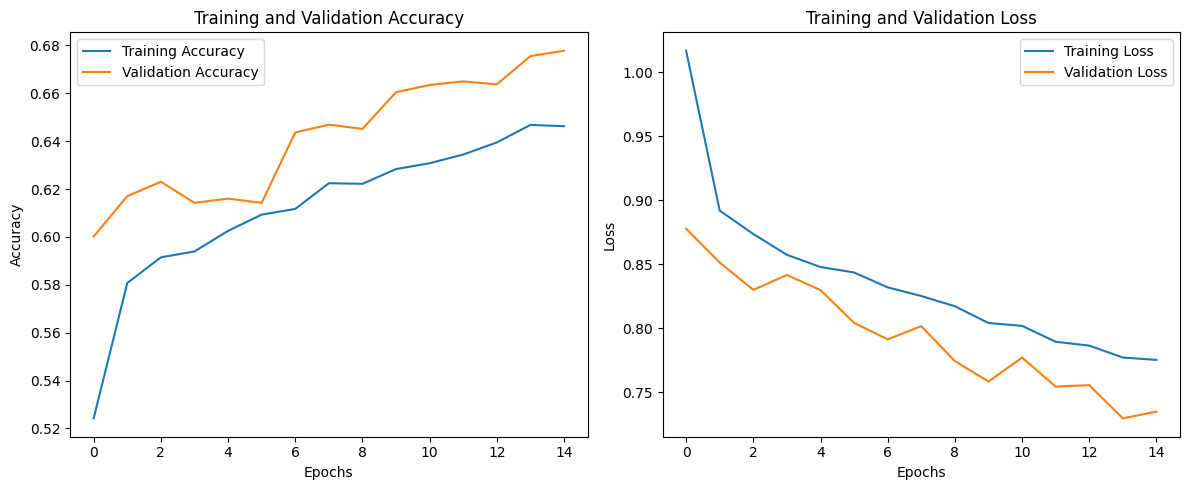

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


###Milestone 3

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


249/249 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.5350 - loss: 1.0192 - val_accuracy: 0.5477 - val_loss: 1.1066 - learning_rate: 1.0000e-04
Epoch 2/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5418 - loss: 0.9362 - val_accuracy: 0.5475 - val_loss: 1.0374 - learning_rate: 1.0000e-04
Epoch 3/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5758 - loss: 0.9131 - val_accuracy: 0.5984 - val_loss: 0.8748 - learning_rate: 1.0000e-04
Epoch 4/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5862 - loss: 0.8858 - val_accuracy: 0.6082 - val_loss: 0.8496 - learning_rate: 1.0000e-04
Epoch 5/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5877 - loss: 0.8790 - val_accuracy: 0.6060 - val_loss: 0.8486 - learning_rate: 1.0000e-04
Epoch 6/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6010 - loss: 0.8656 - val_accuracy: 0.6195 - val_loss: 0.8317 - learning_rate: 1.0000e-04
Epoch 7/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accurac

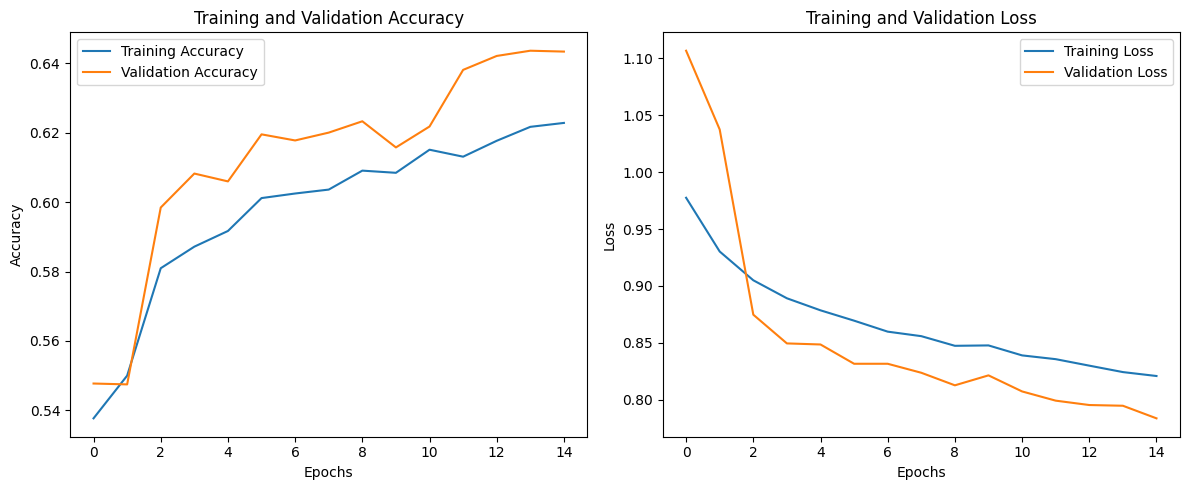

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, SpatialDropout2D, Reshape, LSTM, Bidirectional, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
from PIL import Image

# Load CSV file with image IDs and class labels
csv_path = "/content/train.csv"
data_info = pd.read_csv(csv_path)

# Function to preprocess images
def preprocess_image(image_path, target_size=(160, 160)):
    try:
        with Image.open(image_path) as img:
            img = img.convert("RGB")  # Ensure 3 channels
            img = img.resize(target_size)
            img_array = np.array(img) / 255.0  # Normalize to range [0, 1]
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Preprocess images and labels
image_folder_path = "/content/data/"
X = []
y_age = []
for _, row in data_info.iterrows():
    image_id, age_class = row['ID'], row['Class']
    image_path = os.path.join(image_folder_path, image_id)
    img_array = preprocess_image(image_path)
    if img_array is not None:
        X.append(img_array)
        y_age.append(age_class)

X = np.array(X)
y_age = np.array(y_age)

# Encode labels to numeric values
label_encoder_age = LabelEncoder()
y_age_encoded = label_encoder_age.fit_transform(y_age)
y_age_categorical = to_categorical(y_age_encoded)

# Split data into training and validation sets
X_train, X_val, y_train_age, y_val_age = train_test_split(
    X, y_age_categorical, test_size=0.2, random_state=42
)

input_layer = Input(shape=(160, 160, 3))

# Convolutional Layers with Batch Normalization and Dropout
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = SpatialDropout2D(0.3)(x)

# RNN Layer with LSTM
x = GlobalAveragePooling2D()(x)
x = Reshape((1, -1))(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
x = Flatten()(x)

x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)

# Output layer
age_output = Dense(len(label_encoder_age.classes_), activation='softmax', name='age_output')(x)

model = Model(inputs=input_layer, outputs=age_output)

# Compile model with learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for training stabilization
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-7
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train_age,
    validation_data=(X_val, y_val_age),
    epochs=15,
    batch_size=64,  # Increase batch size to stabilize gradients
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate the model
model.evaluate(X_val, y_val_age)

# Plot Training & Validation Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
